In [8]:
import pandas as pd


file_path = "drugdata.csv"  
drugdata = pd.read_csv(file_path)


print(drugdata.head())


   Unnamed: 0  Age Sex      BP Cholesterol  Na_to_K   Drug
0           0   23   F    HIGH        HIGH   25.355  drugY
1           1   47   M     LOW        HIGH   13.093  drugC
2           2   47   M     LOW        HIGH   10.114  drugC
3           3   28   F  NORMAL        HIGH    7.798  drugX
4           4   61   F     LOW        HIGH   18.043  drugY


In [9]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for column in drugdata.select_dtypes(include=['object']):
    label_encoders[column] = LabelEncoder()
    drugdata[column] = label_encoders[column].fit_transform(drugdata[column])


print(drugdata.head())

   Unnamed: 0  Age  Sex  BP  Cholesterol  Na_to_K  Drug
0           0   23    0   0            0   25.355     4
1           1   47    1   1            0   13.093     2
2           2   47    1   1            0   10.114     2
3           3   28    0   2            0    7.798     3
4           4   61    0   1            0   18.043     4


In [22]:
import csv
import random

def load_csv(filename):
    with open(filename, 'r') as file:
        csv_reader = csv.reader(file)
        data = [row for row in csv_reader]
    return data

def split_data(dataset, split_ratio=0.8):
    dataset_copy = list(dataset)
    train_size = int(len(dataset_copy) * split_ratio)
    train_set = []
    while len(train_set) < train_size:
        index = random.randrange(len(dataset_copy))
        train_set.append(dataset_copy.pop(index))
    return train_set, dataset_copy

filename = 'drugdata.csv'
tips_data = load_csv(filename)

train_set, test_set = split_data(tips_data, split_ratio=0.8)

for row in train_set[:5]:
    print(row)

print("\nTesting Set:")
for row in test_set[:5]:
    print(row)

['188', '65', 'M', 'HIGH', 'NORMAL', '34.997', 'drugY']
['157', '53', 'M', 'LOW', 'HIGH', '22.963', 'drugY']
['189', '64', 'M', 'HIGH', 'NORMAL', '20.932', 'drugY']
['80', '60', 'M', 'HIGH', 'HIGH', '13.934', 'drugB']
['62', '67', 'M', 'LOW', 'NORMAL', '20.693', 'drugY']

Testing Set:
['1', '47', 'M', 'LOW', 'HIGH', '13.093', 'drugC']
['8', '60', 'M', 'NORMAL', 'HIGH', '15.171', 'drugY']
['18', '23', 'M', 'LOW', 'HIGH', '7.298', 'drugC']
['24', '33', 'F', 'LOW', 'HIGH', '33.486', 'drugY']
['25', '28', 'F', 'HIGH', 'NORMAL', '18.809', 'drugY']


In [12]:
from sklearn.model_selection import train_test_split


X = drugdata.drop(columns=['Drug'])  
y = drugdata['Drug']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (160, 6)
X_test shape: (40, 6)
y_train shape: (160,)
y_test shape: (40,)


In [18]:
import numpy as np

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

def predict(X_train, y_train, X_test, k):
    y_pred = []
    for test_point in X_test:
        distances = [euclidean_distance(test_point, train_point) for train_point in X_train]
        nearest_indices = np.argsort(distances)[:k]
        nearest_labels = [y_train[i] for i in nearest_indices]
        y_pred.append(max(set(nearest_labels), key=nearest_labels.count))
    return y_pred

def accuracy(y_true, y_pred):
    correct = sum(1 for true, pred in zip(y_true, y_pred) if true == pred)
    return correct / len(y_true)

def confusion_matrix(y_true, y_pred, labels):
    matrix = np.zeros((len(labels), len(labels)), dtype=int)
    label_to_index = {label: i for i, label in enumerate(labels)}
    for true, pred in zip(y_true, y_pred):
        matrix[label_to_index[true]][label_to_index[pred]] += 1
    return matrix

# Example usage
k = 5  # Number of neighbors
y_pred = predict(X_train.to_numpy(), y_train.to_numpy(), X_test.to_numpy(), k)

acc = accuracy(y_test.to_numpy(), y_pred)
conf_matrix = confusion_matrix(y_test.to_numpy(), y_pred, labels=np.unique(y_test))

print("Accuracy:", acc)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.45
Confusion Matrix:
 [[ 1  0  0  2  3]
 [ 0  2  0  0  1]
 [ 0  1  0  2  2]
 [ 2  4  0  2  3]
 [ 1  0  0  1 13]]


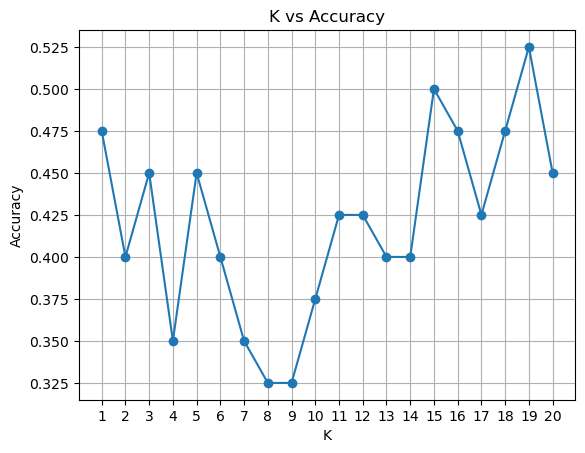

Value of k for maximum accuracy: 19


In [20]:
import matplotlib.pyplot as plt

# Define a function to evaluate K-NN with different values of K
def evaluate_knn(X_train, y_train, X_test, y_test, k_values):
    accuracies = []
    for k in k_values:
        y_pred = predict(X_train, y_train, X_test, k)
        acc = accuracy(y_test, y_pred)
        accuracies.append(acc)
    return accuracies

# Define range of K values to evaluate
k_values = range(1, 21)  # Testing K values from 1 to 20

# Evaluate K-NN for each K value
accuracies = evaluate_knn(X_train, y_train, X_test, y_test, k_values)


plt.plot(k_values, accuracies, marker='o')
plt.title("K vs Accuracy")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.xticks(k_values)
plt.grid(True)
plt.show()


max_accuracy = max(accuracies)
best_k = k_values[accuracies.index(max_accuracy)]
print("Value of k for maximum accuracy:", best_k)